<a href="https://www.kaggle.com/code/mrsimple07/restaurants-revenue-eda-prediction?scriptVersionId=175236472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv


# Restaurants Revenue EDA and Prediction

Welcome to the Restaurants Revenue EDA and Prediction project! In this notebook, we will explore a dataset containing information about various restaurants and their revenue. We will perform Exploratory Data Analysis (EDA) to gain insights into the data, understand its structure, and identify patterns or trends.

## Dataset Overview
The dataset consists of several features related to each restaurant, such as location, type of cuisine, opening hours, and more. Additionally, it includes the revenue generated by each restaurant.

## Goals
1. **Exploratory Data Analysis (EDA):** We will analyze the data to uncover relationships between different features and revenue. This will involve visualizations, summary statistics, and data manipulation techniques.

2. **Prediction:** Using machine learning algorithms, we will build predictive models to forecast the revenue of restaurants. We will train the models on a subset of the data and evaluate their performance using appropriate metrics.

3. **Model Interpretation:** We will interpret the results of our predictive models to understand the factors that most strongly influence restaurant revenue.

## Note
This notebook is intended for educational purposes and serves as a demonstration of EDA techniques and predictive modeling. The goal is to provide insights into the factors affecting restaurant revenue and to showcase methods for predicting future revenue based on available data.

Let's begin our exploration and analysis of restaurant revenue data!

# Importing Data

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


Overall data information

In [3]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


Checking missing values in the data

In [5]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

# Exploratoy Data Analysis (EDA)

1. **Distribution of Numerical Variables:**
   - Plot histograms or density plots to visualize the distribution of numerical variables such as 'Number_of_Customers', 'Menu_Price'.


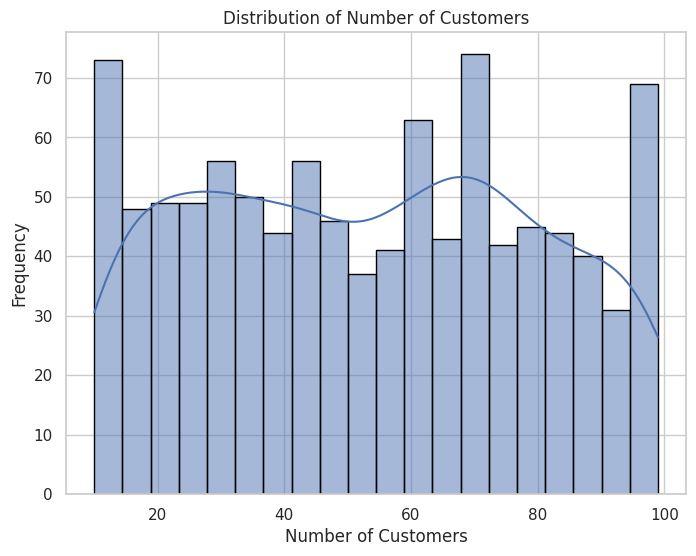

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style ='whitegrid')

plt.figure(figsize=(8, 6))
sns.histplot(df['Number_of_Customers'], bins=20,kde =True, edgecolor='black')
plt.title('Distribution of Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

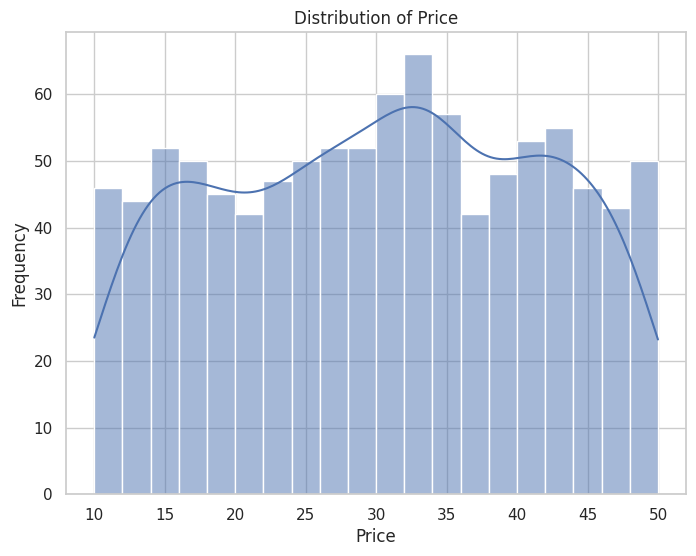

In [7]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Menu_Price'], kde =True, bins = 20)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


2. **Categorical Variables Analysis:**
   - Explore the distribution of the 'Cuisine_Type' variable using bar plots to see the frequency of each cuisine type.

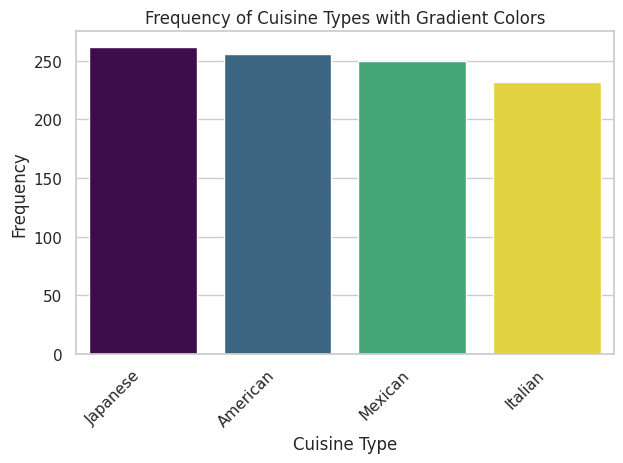

In [8]:
cuisine_num = df['Cuisine_Type'].value_counts()
cmap = plt.get_cmap('viridis')


sns.barplot(x=cuisine_num.index, y=cuisine_num.values, palette=cmap(np.linspace(0, 1, len(cuisine_num))))
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Frequency of Cuisine Types with Gradient Colors')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()
plt.show()

3. **Correlation Analysis:**
   - Compute the correlation matrix between numerical variables and visualize it using a heatmap. This will help identify potential correlations between variables, especially with the target variable 'Monthly_Revenue'.

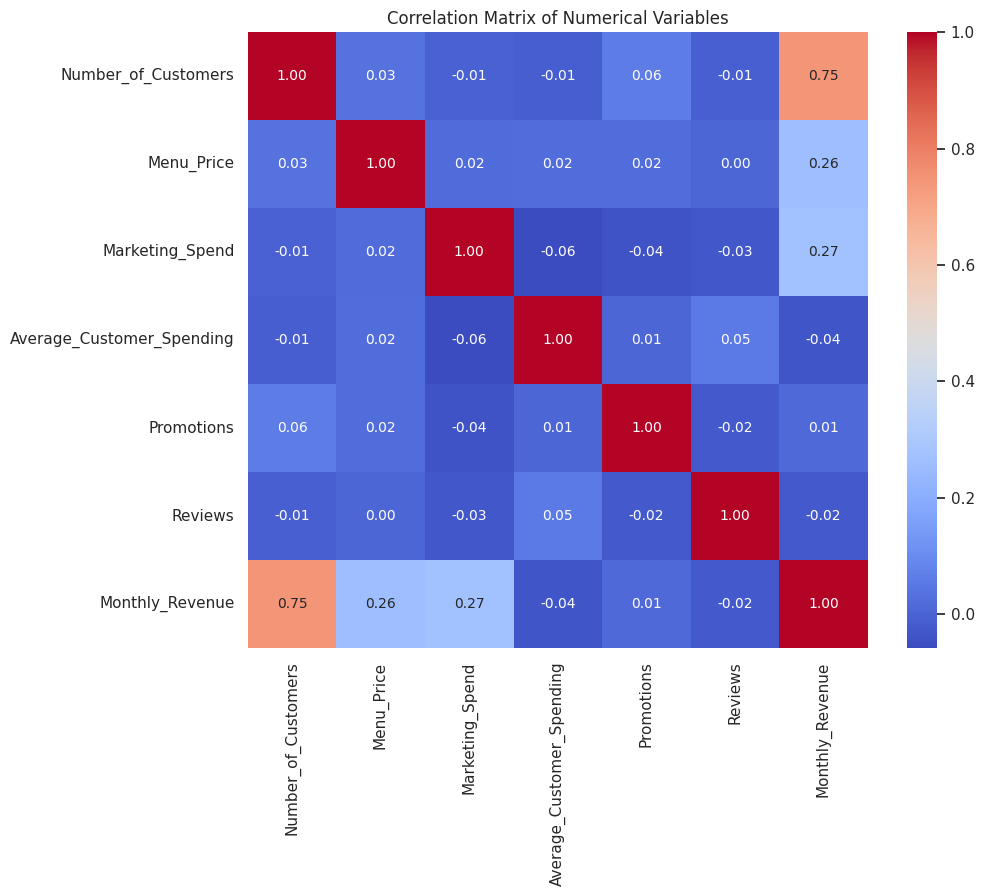

In [9]:
corr_matrix = df.drop(['Cuisine_Type'], axis =1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

4. **Feature Relationships:**
   - Let's explore relationships between pairs of variables using scatter plots or pair plots to identify any patterns or trends in the data.


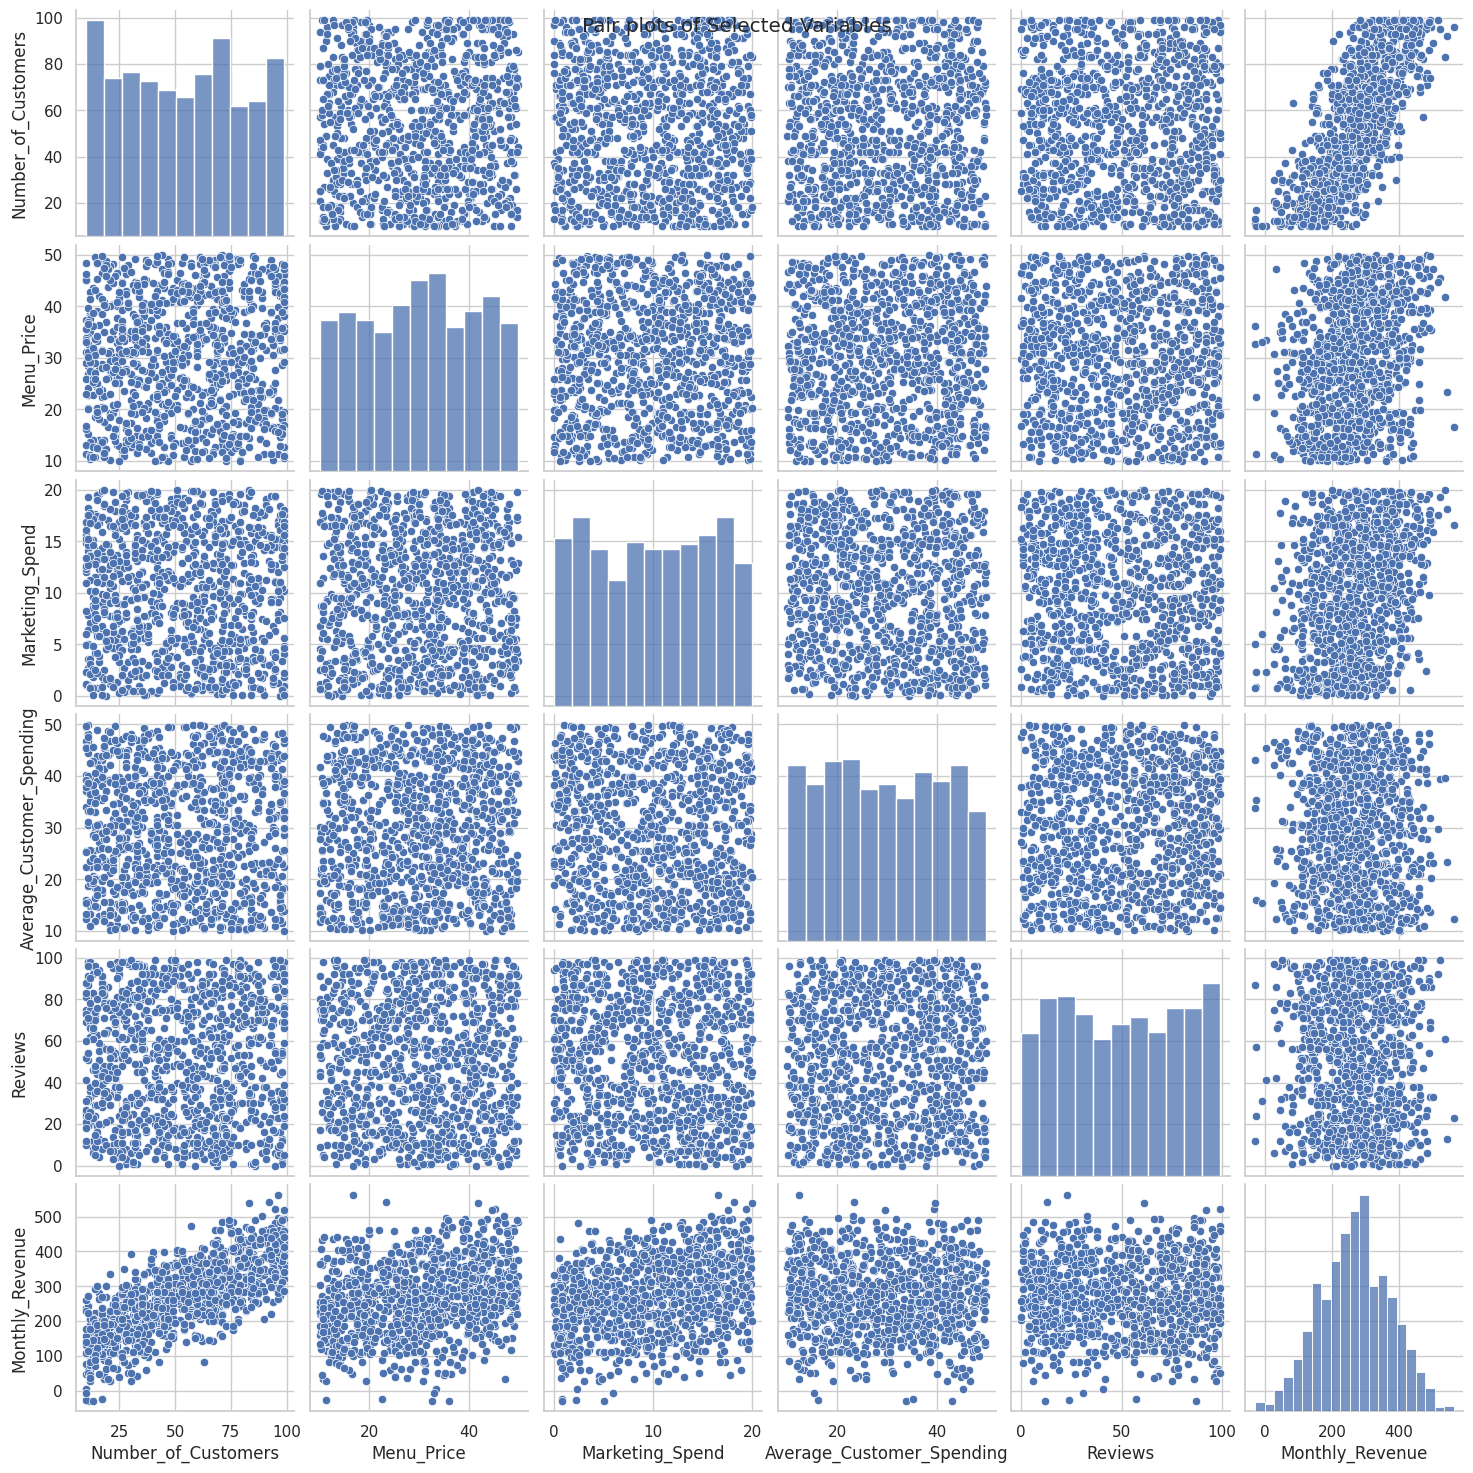

In [10]:
selected_variables = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Reviews', 'Monthly_Revenue']

sns.pairplot(df[selected_variables])
plt.suptitle('Pair plots of Selected Variables')
plt.show()

5. **Outlier Detection:**
   - Use box plots or scatter plots to detect any outliers in numerical variables, which may need to be treated or investigated further.

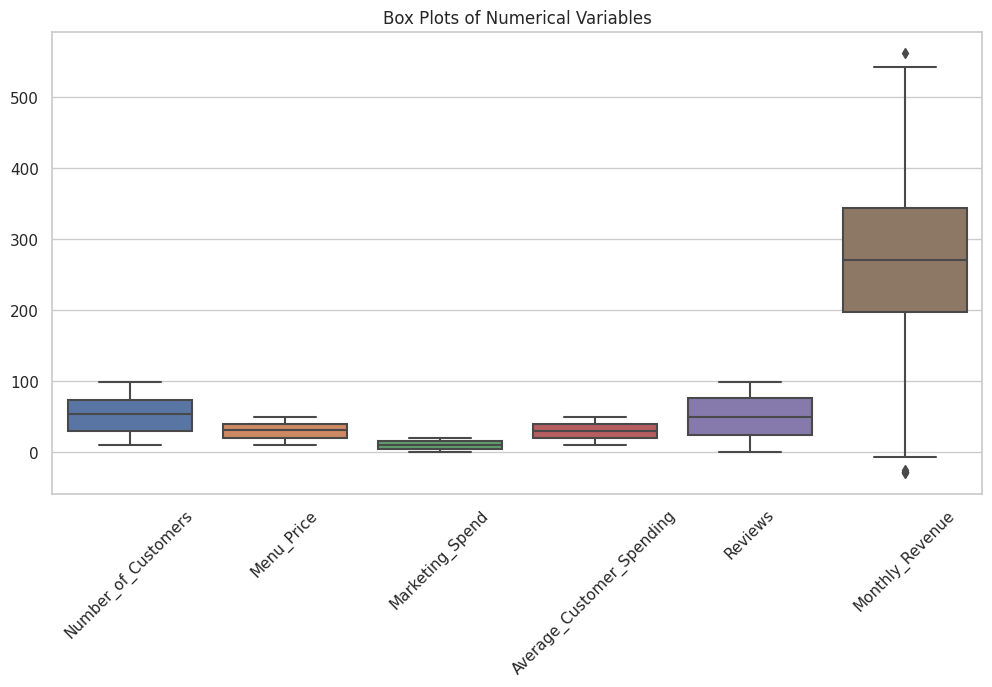

In [11]:
numerical_variables = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Reviews', 'Monthly_Revenue']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_variables])
plt.title('Box Plots of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

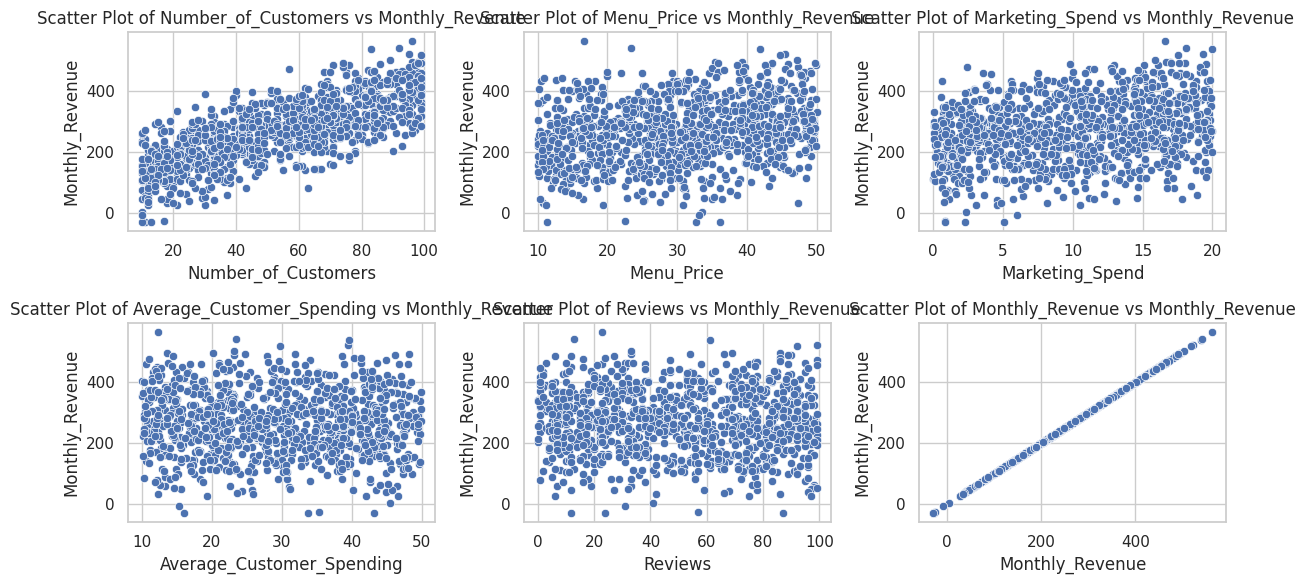

In [12]:
plt.figure(figsize=(12, 6))
for i, var in enumerate(numerical_variables):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=var, y='Monthly_Revenue', data=df)
    plt.title(f'Scatter Plot of {var} vs Monthly_Revenue')
plt.tight_layout()
plt.show()

# Model Selection & Evaluation

We have non categorical value. So, we are going to convert it into numerical

In [13]:
df = pd.get_dummies(df)

We can use linear regression to predict the revenue

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(['Monthly_Revenue'], axis =1)
y = df['Monthly_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test,y_pred))

3560.4388349737924


Cross validation with Decision Tree

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings('ignore')

model = RandomForestRegressor()

cv_score = cross_val_score(model, X,y, cv =5, scoring ='neg_mean_squared_error')
print(cv_score)
print(cv_score.mean())

[-3679.25637179 -3492.09482976 -3999.93227816 -4574.67308981
 -3562.79802062]
-3861.7509180294264
